Mounted at /content/drive
Missing Values:
 footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64
Dataset Description:
           footfall    tempMode          AQ         USS          CS  \
count   944.000000  944.000000  944.000000  944.000000  944.000000   
mean    306.381356    3.727754    4.325212    2.939619    5.394068   
std    1082.606745    2.677235    1.438436    1.383725    1.269349   
min       0.000000    0.000000    1.000000    1.000000    1.000000   
25%       1.000000    1.000000    3.000000    2.000000    5.000000   
50%      22.000000    3.000000    4.000000    3.000000    6.000000   
75%     110.000000    7.000000    6.000000    4.000000    6.000000   
max    7300.000000    7.000000    7.000000    7.000000    7.000000   

              VOC          RP          IP  Temperature        fail  
count  944.000000  944.000000  944.000000   944.0000

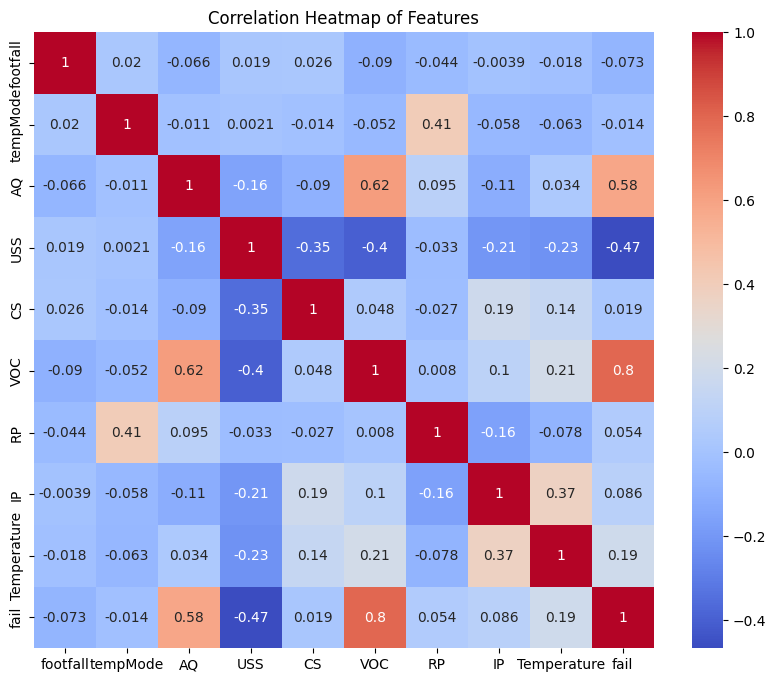

Random Forest Model Evaluation:

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       102
           1       0.86      0.87      0.87        87

    accuracy                           0.88       189
   macro avg       0.88      0.88      0.88       189
weighted avg       0.88      0.88      0.88       189

Confusion Matrix:
 [[90 12]
 [11 76]]
Accuracy: 87.83%


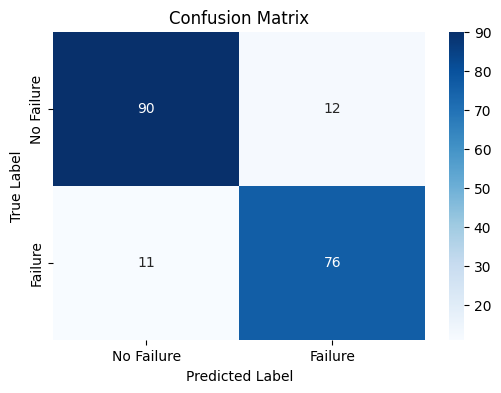

<ipython-input-1-ee13e5752d6f>:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When groupi

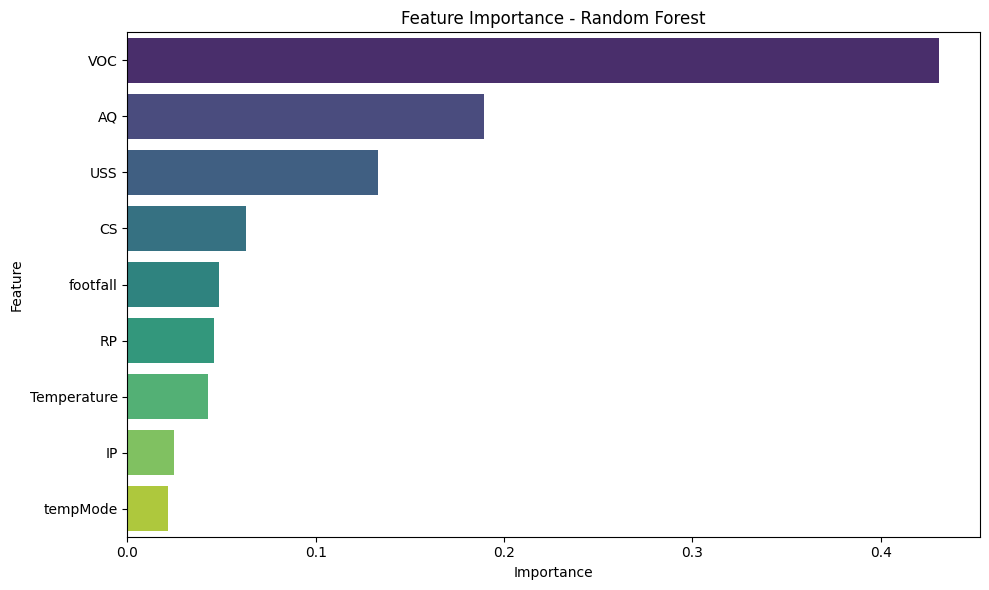

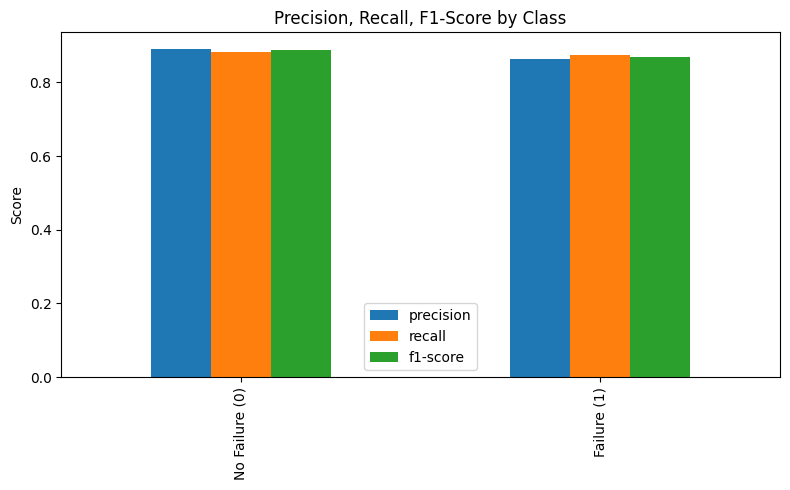

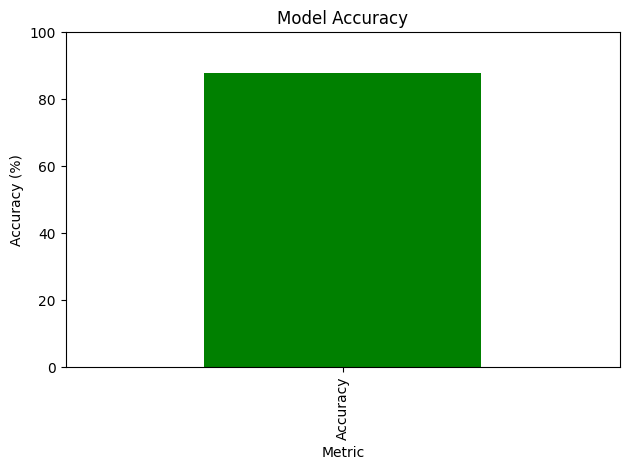

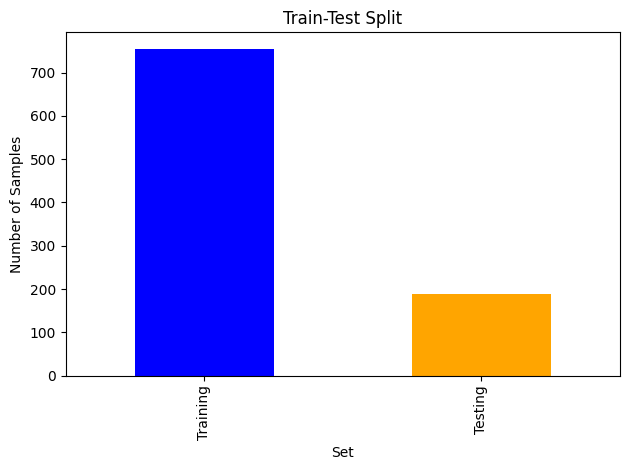

In [1]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Mount Google Drive (to load data and save files)
from google.colab import drive
drive.mount('/content/drive')

# Step 3: Define Path to the Shared Folder in Google Drive
folder_path = '/content/drive/MyDrive/Teachnook major project/'  # Adjust this path as per your Google Drive structure

# Step 4: Load Dataset from CSV File
data_path = folder_path + 'data.csv'
data = pd.read_csv(data_path)

# Step 5: Data Preprocessing
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

# Print dataset summary
print("Dataset Description:\n", data.describe())

# Step 6: Exploratory Data Analysis (EDA)
# Correlation Heatmap (Visualization 1)
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

# Step 7: Train-Test Split
# Define features (X) and target variable (y)
X = data.drop(columns='fail')  # Drop the target column (adjust 'fail' if necessary)
y = data['fail']  # The target column is 'fail'

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 9: Model Training (Random Forest Classifier)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

# Step 10: Model Predictions
y_pred_rf = rf.predict(X_test_scaled)

# Step 11: Model Evaluation
# Print Classification Report (Includes Precision, Recall, and F1-Score for each class)
print("Random Forest Model Evaluation:\n")
print(classification_report(y_test, y_pred_rf))

# Calculate Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Step 12: Confusion Matrix Visualization (Visualization 2)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Step 13: Feature Importance Visualization (Visualization 3)
# Get Feature Importance from Random Forest
feature_importances = rf.feature_importances_
features = X.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

# Step 14: Model Performance Metrics (Precision, Recall, F1-Score) Visualization (Visualization 4)
# Extract values from classification report
performance_metrics = classification_report(y_test, y_pred_rf, output_dict=True)

# Convert performance metrics to DataFrame
metrics_df = pd.DataFrame(performance_metrics).transpose()
metrics_df = metrics_df[['precision', 'recall', 'f1-score']].drop(index=['accuracy', 'macro avg', 'weighted avg'])

# Plot Precision, Recall, F1-Score
metrics_df.plot(kind='bar', figsize=(8, 5), title='Precision, Recall, F1-Score by Class')
plt.xticks(ticks=[0, 1], labels=['No Failure (0)', 'Failure (1)'])
plt.ylabel('Score')
plt.tight_layout()
plt.show()

# Step 15: Model Accuracy Visualization (Visualization 5)
# Plot Model Accuracy as a bar chart
accuracy_df = pd.DataFrame({'Metric': ['Accuracy'], 'Value': [accuracy * 100]})
accuracy_df.plot(kind='bar', x='Metric', y='Value', legend=False, color='green')
plt.title('Model Accuracy')
plt.ylim(0, 100)
plt.ylabel('Accuracy (%)')
plt.tight_layout()
plt.show()

# Step 16: Train-Test Split Visualization (Visualization 6)
# Visualize the split between training and testing data
train_test_split_df = pd.DataFrame({
    'Set': ['Training', 'Testing'],
    'Proportion': [len(X_train), len(X_test)]
})

train_test_split_df.plot(kind='bar', x='Set', y='Proportion', legend=False, color=['blue', 'orange'])
plt.title('Train-Test Split')
plt.ylabel('Number of Samples')
plt.tight_layout()
plt.show()

# Step 17: Export Metrics and Visualizations (Optional)
# Export metrics and important data to CSV files (for Power BI or further analysis)
metrics_df.to_csv(folder_path + 'model_performance_metrics.csv', index=True)
importance_df.to_csv(folder_path + 'feature_importance.csv', index=False)
cm_df = pd.DataFrame(cm, index=['No Failure', 'Failure'], columns=['Predicted No Failure', 'Predicted Failure'])
cm_df.to_csv(folder_path + 'confusion_matrix.csv', index=True)

# Step 18: Save the Model (Optional)
import pickle
with open(folder_path + 'random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)
